$$
\newcommand{\RR}{\mathbb{R}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\N}{\mathbb{N}}
$$


## L3 Mathématiques - 2023/24 - Univ. Paris-Saclay
## Analyse théorique et numérique des EDO 
---------------------------------------------------------------------------------------------------------------

## TP 2 : Représentation des solutions d'un systèmes d'EDO. Le modèle de Lotka-Volterra.
---------------------------------------------------------------------------------------------------------------

## Partie 1. Représentation des solutions et champs de vecteurs pour un système d'EDO.

Soit $F:\mathbb{R}\times\mathbb{R^2}\longrightarrow\mathbb{R^2},\ \ \big(t,(x,y)\big)\mapsto\big(F_1(t,(x,y)),F_2(t,(x,y))\big)$, une fonction de classe $C^1$ et considérons le système différentiel
$$
(S)\ \ \ \ \ \ \ 
\begin{cases}
x'(t)=F_1\big(t,(x(t),y(t))\big)\\
y'(t)=F_2\big(t,(x(t),y(t))\big)
\end{cases}
$$


Pour représenter graphiquement les solutions de $(S)$, il y a plusieurs choix possibles :

- Tracer dans $\RR^3$ le graphe de la fonction $t \mapsto (x(t), y(t))$ ;
- Tracer dans $\RR^2$ les graphes des fonctions $t \mapsto x(t)$ et $t \mapsto y(t)$ ;
- Tracer dans $\RR^2$ la courbe paramétrée $\{(x(t), y(t)) | t ∈ J\}$ ; c’est la projection du graphe de $t\mapsto(x(t),y(t))$ dans le plan $(x, y)$, appelé *plan de phase*.

Pour un *système autonome*, c'est-à-dire tel que $F_1$ et $F_2$ ne dépendent pas de $t$, il est utile de représenter également dans le plan $(x,y)$ le champ de vecteurs associé au système
$(S)$, qui est l'application 
$$
V:(x,y)\mapsto\big(F_1(x,y),F_2(x,y)\big).
$$
Pour tout $t$, le vecteur $\big(F_1\big(x(t),y(t)\big),F_2\big(x(t),y(t)\big)\big)$ est tangent à la courbe représentant une solution de $(S)$ au point $(x(t),y(t))$. Représenter le champ de vecteurs aide à comprendre la direction des trajectoires dans le plan de phase, car avec cette représentation on perd l'information précise sur l'évolution en temps de la solution.

### Exercice 1. Représentation des solutions d'une EDO et des champs de vecteurs.

On s'intérèsse au système différentiel linéaire $X' = AX$, avec
$$
A=\begin{bmatrix}
0 & 1\\
−2 &−3
\end{bmatrix}.
$$

**Question 1).** Tracer dans le plan $(x,y)$ le champ de vecteurs associé dans le carré $[−5, 5]\times[−5; 5]$.
Tracer sur la même figure, les trajectoires des solutions $(x(t),y(t))$ de ce système, avec $t$ variant de −$10$ à $10$, pour chacune des conditions initiales suivantes :
$(x(−10), y(−10)) = (1, 2),\ (−2, −2),\  (0, −4),\ (1, -2)$ et $(3, 4)$. Déterminer également les sous-espaces propres de A et les représenter sur la même figure.

*Les vecteurs propres de $A$ sont $-1$ et $-2$ et les vecteurs propres associés sont respectivement $(1,-1)$ et $(1,-2)$. La solution du problème de Cauchy $X'=AX,\ X(t_0)=X_0$ est déjà programmée.*

*Pour tracer le champ de vecteurs vous pouvez utiliser les commandes programmées*.


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

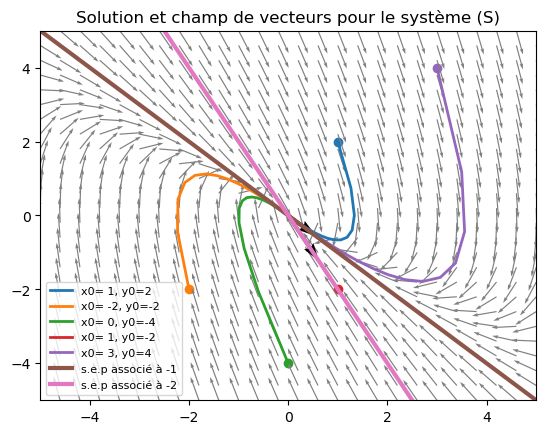

In [2]:
# Fonction F définissant l'EDO
def F(Y):
    x=Y[0]
    y=Y[1]
    A=np.array([[0,1],[-2,-3]])
    return np.dot(A,Y)

# ou 
def F1(x,y):
    return y

def F2(x,y):
    return -2*x-3*y

# Solution exacte de Y'=AY, Y(t_0)=Y_0
def uex(t,t0,Y0):
    U1=np.array([1,-1])
    U2=np.array([1,-2])
    P=np.ones((2,2))
    P[:,0]=U1
    P[:,1]=U2
    C=np.linalg.solve(P,Y0)
    return np.array([(C[0]*np.exp(-(t-t0))*U1[0]+C[1]*np.exp(-2*(t-t0))*U2[0]),(C[0]*np.exp(-(t-t0))*U1[1]+C[1]*np.exp(-2*(t-t0))*U2[1])])

## Représentation des solutions pour chaque valeur de la donnée initiale 
t = np.linspace(-10,10,100)
t0 = t[0]
for x,y in zip([1,-2,0,1,3],[2,-2,-4,-2,4]):
    sol = uex(t,t0,[x,y])
    plt.plot(sol[0],sol[-1],label=f'x0= {x}, y0={y}',lw=2)
    plt.scatter(x,y)

#Tracé du champ de vecteurs
x=np.linspace(-5,5,26)
y=x
xx,yy=np.meshgrid(x,y)
U=F1(xx,yy)/np.sqrt(F1(xx,yy)**2+F2(xx,yy)**2)
V=F2(xx,yy)/np.sqrt(F1(xx,yy)**2+F2(xx,yy)**2)
plt.quiver(xx,yy,U,V,angles='xy',scale=20,color='grey',minshaft=1.4)
plt.axis([-5.,5,-5,5])

## Représentation des espaces propres 
def espace_propre(t,vect):
    return np.array([t*vect[0],t*vect[-1]])

for lam,vect in zip([-1,-2],[[1,-1],[1,-2]]):
    esp = espace_propre(t,vect)
    plt.plot(esp[0],esp[-1],label=f's.e.p associé à {lam}',lw=3)
    plt.quiver(0,0,vect[0],vect[1],scale=20,angles='xy')
    
plt.legend(fontsize=8,loc=3)
plt.title('Solution et champ de vecteurs pour le système (S)')
plt.show()

## Partie 2. Le modèle de Lotka-Volterra

On se donne deux populations $H(t)$ de sardines (les proies) et $P(t)$ de requins (les prédateurs) au temps $t,$ dont l'évolution au cours du temps suit la loi

\begin{equation}
(LV)\ \ \   
\begin{cases}
    H'(t) = H(t)(a - b P(t)) \\
    P'(t) = P(t)(-c  + d H(t)),
  \end{cases}
\end{equation}

où $a,b,c,d >0$. On suppose connues les populations de sardines et de requins à l'instant initial $t_0=0$ :

\begin{equation}
  \begin{cases}
    H(0) = H_0, \\
    P(0) = P_0,
  \end{cases}
\end{equation}
où $H_0\ge 0$ et $P_0\ge 0$ sont donnés.


**Pour les applications numériques, on choisira 
$a=0,1$, $b=d=5\cdot 10^{-5},$ $c=0,04$, $T=200$ ans et une population initiale de $H_0=2000$ sardines et $P_0=1000$ requins.**

### Exercice 1.
**Question 1).** En posant $X = (H,P)$, réécrire le système $(LV)$
sous la forme $X' = F(X)$, où $F=(F_1,F_2)$ avec $F_1,F_2$ deux fonctions définies sur $\R^2$ à valeurs dans $\R$. Justifier que le problème de Cauchy pour $(LV)$ admet une unique solution maximale.


**Question 2).** Donner la solution (maximale) du problème de Cauchy dans chacun des quatre cas suivants :
- $(H_0,P_0)=(0,0)$ ;
- $(H_0,P_0)=(\frac cd,\frac ab)$ ; 
- $H_0=0$ et $P_0>0$ ;
- $H_0>0$ et $P_0=0$.

**A faire en python.** Dans le plan $(H,P)$, représentez  les points d'équilibre du système (les points $(H^*,P^*)$ tels que $F(H^*,P^*)=(0,0)$. Étudier le signe des dérivées $H'$ et $P'$ selon la position de $H,P$ par rapport aux points d'équilibre, en représentant le champs de vecteurs dans le plan $(H,P)$ (représentez également les droites $H=H^*,\ P=P^*$). Intuitez quel sera le comportement des solutions $(H,P)$ suivant la condition initiale. 

*Pour représenter le champs de vecteurs, vous pourrez utiliser les commandes suivantes :*

`h,p = np.meshgrid(np.linspace(0 , 3000, 20),np.linspace (0 , 4500, 30))`

`n=np.sqrt(F1(h,p)**2+F2(h,p)**2)` 

`n=np.sqrt(F1(h,p)**2+F2(h,p)**2))` 

`plt.quiver (h , p, F1(h , p)/n, F2 (h , p)/n,angles='xy',scale=20,color='blue')`


In [4]:
#Paramètres
a, b, c, d = 0.1, 5e-5, 0.04, 5e-5
T = 200

#Donnée initiales
H0, P0 = 2000, 1000

#Point initiale
Heq = c/d
Peq = a/b

def F1(H,P):
    return H*(a - b*P)

def F2(H,P):
    return P*(-c + d*H)

/tmp/ipykernel_525/669326227.py:6: RuntimeWarning: invalid value encountered in divide
  plt.quiver (h , p, F1(h , p)/n, F2(h , p)/n,angles='xy',scale=20,color='grey')


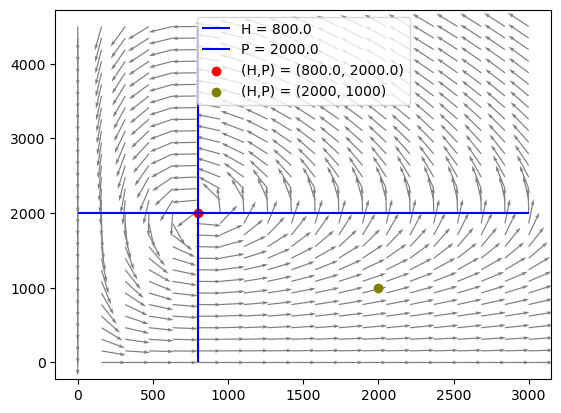

In [8]:
h,p = np.meshgrid(np.linspace(0 , 3000, 20),np.linspace (0 , 4500, 30))
x,y = np.linspace(0,3000,20) , np.linspace(0,4500,30)

n=np.sqrt(F1(h,p)**2 + F2(h,p)**2)

plt.quiver (h , p, F1(h , p)/n, F2(h , p)/n,angles='xy',scale=20,color='grey')
plt.hlines(Peq,0,3000,label=f'H = {Heq}',color='b')
plt.vlines(Heq,0,4500, label= f'P = {Peq}',color='b')
plt.scatter(Heq,Peq,label = f'(H,P) = {Heq,Peq}',marker = 'o',color = 'r')
plt.scatter(H0,P0,label = f'(H,P) = {H0,P0}',marker = 'o',color = 'olive')
plt.legend()
plt.show()

### Exercice 2. Analyse théorique du modèle (voir TD3).

**Question 1).**
Soit $Q = \{ (x,y)\in \R^2\mid x,y >0\}$. Démontrer que si la
condition initiale $(H_0,P_0)\in Q$, alors $(H(t),P(t)) \in Q$ pour
tout temps $t>0$ où la solution est définie.

*Indication : Utiliser l'unicité dans le théorème de Cauchy-Lipschitz pour montrer que le graphe de $(H,P)$ ne peut pas croiser le graphe d'une solution bien choisie qui passe par la droite $x=0$ ou $y=0.$*

**Question 2).**
On suppose que $(H_0,P_0) \in Q$ et soit 
  $(H,P)$ la solution maximale du problème de Cauchy pour $(LV)$, de donnée initiale $(H_0,P_0)$.

- Montrer une inégalité différentielle faisant apparaître la quantité $\phi(t) := dH(t) + bP(t)$ au cours du temps. En déduire que la solution $(H,P)$ est définie sur $\R^+$.

*Indication : Dériver $\phi,$ obtenir ensuite une majoration pour $\phi$ et appliquer le théorème des bouts.*

- ($*$) En étudiant la relation entre $(-c+dH)H'/H$ et $(a-bP)P'/P$, construire une fonction $E(x,y) = k(x) + \ell(y)$ vérifiant $E(H(t),P(t)) = \mathrm{cst}$ et telle que $\lim_{X\in Q,\|X\|\to +\infty} E(X) = +\infty$. En déduire que les trajectoires de la solution maximale restent bornées.

*Indication : Étudier la relation entre $(-c+dH)H'/H$ et $(a-bP)P'/P$. Déduire de la relation $E(H,P)=cst$ que l'on ne peut pas avoir $\|(H,P)\|\to\infty$ en un instant $t$ fini et utiliser le théorème des bouts.*

- Démontrez que si $(H,P)$ converge quand $t\rightarrow+\infty$, c'est nécessairement vers un point d'équilibre.

*Indication : Si $(H,P)$ converge, vers quoi converge $(H',P')$ ?*

- ($**$) Tracer sur un schéma les *nullclines* $\{ (x,y)\in Q\mid F_i(x,y) = 0 \}$ et les points d'équilibre. Les nullclines divisent le quart de plan $Q$ en quatre ouverts
\begin{align*}
  &A = \{ (x,y) \in Q \mid F_1(x,y) > 0 \hbox{ et } F_2(x,y) < 0 \},\\
  &B = \{ (x,y) \in Q \mid F_1(x,y) > 0 \hbox{ et } F_2(x,y) > 0 \},\\
  &C = \{ (x,y) \in Q \mid F_1(x,y) < 0 \hbox{ et } F_2(x,y) > 0 \},\\
  &D = \{ (x,y) \in Q \mid F_1(x,y) < 0 \hbox{ et } F_2(x,y) < 0 \}.
\end{align*}
Démontrer que si $(H_0,P_0)\in A$, alors la trajectoire de la solution maximale $(H(t),P(t))$
va parcourir successivement les ensembles $A,B,C,D,A,B,$ etc. Montrer
que les deux points de passage successifs de la solution à l'interface
$AB$ sont égaux, et en déduire que la solution $(H,P)$ est périodique.

*Indication: Utiliser la monotonie de $H'$ et $P'$ dans chacune
  des zones $A,B,C,D$ et le fait que la solution est bornée pour
  déduire que si la trajectoire ne quitte pas une zone en temps fini,
  alors elle doit converger vers un des points d'équilibre. Conclure
  par l'absurde.*

### Exercice 3. Approximation numérique (à faire en python).

On s'intéresse dans cette partie, à faire sur python, à l'approximation numérique de la solution du problème de Cauchy pour le système $(LV)$, dans un intervalle de temps de la forme $[0,T].$ 

On choisira de nouveau
$a=0,1$, $b=d=5\cdot 10^{-5},$ $c=0,04$, $T=200$ ans, $H_0=2000$ sardines et $P_0=1000$ requins.

On s'intéresse à calculer une solution approchée du problème de Cauchy par la méthode d'Euler explicite, vue au TP1. On reprend les mêmes notations que dans le TP1 : on se donne un pas $h=\frac{T}{N}>0,$ où $N\in\N,$ on considère une subdivision uniforme de pas $h$ de l'intervalle $[0, T],$ définie par les $(N+1)$ points $t_n=nh,\ n=0,\dots,N$, 
$$
t_0=0,\ t_1:=h,\ \cdots,\ t_N:=Nh=T, 
$$
et on note note $H^n$ (resp. $P^n$) la valeur approchée de $H(t_n)$ (resp. $P(t_n)$) à l'instant $t_n$ pour $n=0,\cdots,N$. 

**Question 1).**
Ecrire le schéma d'Euler explicite associé au modèle de Lotka Volterra.

Ecrire une fonction python `voltEE(T,X0,h)` prenant en argument le temps final $T$, la donnée initiale $X_0=[H_0,P_0]$ correspondant aux valeurs des populations initiales en $t=0$ et le pas de temps $h$ (on pourra prendre en argument $N$ le nombre de points de la discrétisation, au lieu de $h$), et qui calcule une solution approchée de $(LV)$ de donnée initiale $X_0$ par le schéma d'Euler explicite.

Cette fonction retournera trois tableaux:
-  `[$t_0,...,t_N$]` tableau numpy de taille $(N+1)$ contenant les instants de la subdivision en temps ;
- `[$H_0,...,H_N$]` tableau numpy de taille $(N+1)$ contenant les valeurs approchées aux instantes $t_n$ de la population de sardines ;
- `[$P_0,...,P_N$]`  tableau numpy de taille $(N+1)$ contenant les valeurs approchées aux instantes $t_n$ de la population de requins.


**Question 2).**
  Tracer dans la même figure les solutions approchées $[H_0,H_1,\ldots,H_N]$ et $[P_0,P_1,\ldots,P_N]$ en fonction du temps
  avec $h=0.01$. Rajouter des légendes et des titres à votre figure.

Créer une seconde figure et tracer sur cette figure $P$ en fonction de $H$ dans l'espace des phases $(H,P)$. Refaire cette représentation dans la même figure de l'exercice 1, avec les champs de vecteurs.

**Question 3).** Calculer la solution approchée de $(LV)$, en prenant comme condition initiale un des points d'équilibre du système. Ceci confirme-t-il la solution théorique?

**Question 4) (Modélisation de l'impact de la pêche).**
Nous pêchons maintenant une même proportion $p$ de requins et de sardines ce qui se traduit par les deux termes négatifs $-pH(t)$ et $-pP(t)$ dans les équations. Le modèle devient
\begin{equation*}
     \begin{cases}
        H'(t)&=(a-p)H(t)-bH(t)P(t),\\
        P'(t)&=(-c-p)P(t)+dH(t)P(t).
     \end{cases}
\end{equation*}
On choisit $p=0.02$. Reprendre les questions précédentes et observer l'impact de la pêche sur l'évolution des populations. Quelle espèce est favorisée par la pêche? 

/tmp/ipykernel_525/1712972980.py:38: RuntimeWarning: invalid value encountered in divide
  plt.quiver (h , p, F1(h , p)/n, F2 (h , p)/n,angles='xy',scale=20,color='dimgrey')


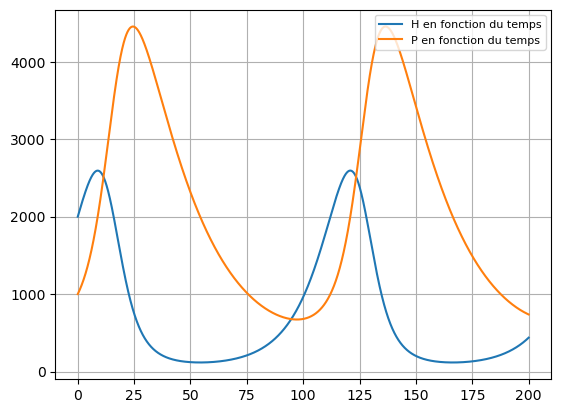

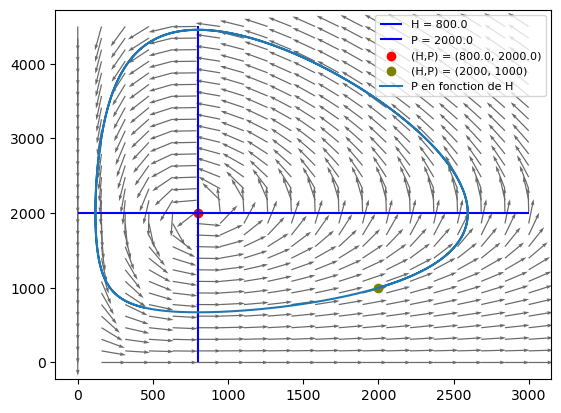

In [9]:
#Paramètres
a, b, c, d = 0.1, 5e-5, 0.04, 5e-5
T = 200

#Donnée initiales
H0, P0 = 2000, 1000
p = 0.02

#Point d'équilibre
Heq = c/d
Peq = a/b

def voltEE(T, X0, h):
    t = np.arange(0, T, h)
    H, P = t*0, t*0
    N = len(t) - 1
    H[0], P[0] = X0
    for n in range(N):
        H[n+1] = H[n] + h * F1(H[n],P[n])
        P[n+1] = P[n] + h * F2(H[n],P[n])
    return t, H, P

t,H,P = voltEE(T,np.array([H0,P0]),0.001)

#Tracé de H et P en fonction du temps t
plt.figure()
plt.plot(t,H,label='H en fonction du temps')
plt.plot(t,P,label='P en fonction du temps')
plt.grid()
plt.legend(fontsize=8,loc=1)

h,p = np.meshgrid(np.linspace(0 , 3000, 20),np.linspace (0 , 4500, 30))
x,y = np.linspace(0,3000,20) , np.linspace(0,4500,30)
n=np.sqrt(F1(h,p)**2 + F2(h,p)**2)

#Tracé de l'évolution des populations H et P 
plt.figure()
plt.quiver (h , p, F1(h , p)/n, F2 (h , p)/n,angles='xy',scale=20,color='dimgrey')
plt.hlines(Peq,0,3000,label=f'H = {Heq}',color='b')
plt.vlines(Heq,0,4500, label= f'P = {Peq}',color='b')
plt.scatter(Heq,Peq,label = f'(H,P) = {Heq,Peq}',marker = 'o',color = 'r')
plt.scatter(H0,P0,label = f'(H,P) = {H0,P0}',marker = 'o',color = 'olive')
plt.plot(H,P,label='P en fonction de H')
plt.legend(fontsize=8,loc=1)

/tmp/ipykernel_463/1846439325.py:42: RuntimeWarning: invalid value encountered in divide
  plt.quiver (h , p, F1(h , p)/n, F2 (h , p)/n,angles='xy',scale=20,color='dimgrey')


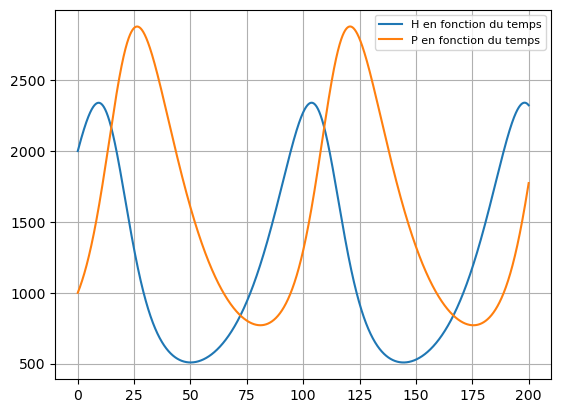

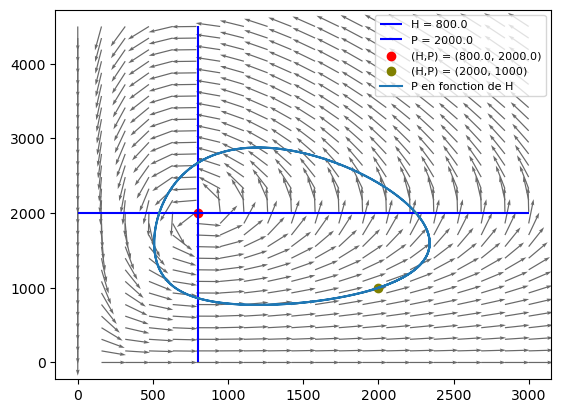

In [6]:
#Paramètres
a, b, c, d = 0.1, 5e-5, 0.04, 5e-5
T = 200

#Donnée initiales
H0, P0 = 2000, 1000
p = 0.02

#Point d'équilibre
Heq = c/d
Peq = a/b

def F1_p(H,P):
    return (a-p)*H - b*H*P

def F2_p(H,P):
    return (-c-p)*P + d*H*P

def voltEE_p(T, X0, h):
    t = np.arange(0, T, h)
    H, P = t*0, t*0
    N = len(t) - 1
    H[0], P[0] = X0
    for n in range(N):
        H[n+1] = H[n] + h * F1_p(H[n],P[n])
        P[n+1] = P[n] + h * F2_p(H[n],P[n])
    return t, H, P

t,H,P = voltEE_p(T,np.array([H0,P0]),0.001)

plt.figure()
plt.plot(t,H,label='H en fonction du temps')
plt.plot(t,P,label='P en fonction du temps')
plt.grid()
plt.legend(fontsize=8,loc=1)

h,p = np.meshgrid(np.linspace(0 , 3000, 20),np.linspace (0 , 4500, 30))
x,y = np.linspace(0,3000,20) , np.linspace(0,4500,30)
n=np.sqrt(F1(h,p)**2 + F2(h,p)**2)

plt.figure()
plt.quiver (h , p, F1(h , p)/n, F2 (h , p)/n,angles='xy',scale=20,color='dimgrey')
plt.hlines(Peq,0,3000,label=f'H = {Heq}',color='b')
plt.vlines(Heq,0,4500, label= f'P = {Peq}',color='b')
plt.scatter(Heq,Peq,label = f'(H,P) = {Heq,Peq}',marker = 'o',color = 'r')
plt.scatter(H0,P0,label = f'(H,P) = {H0,P0}',marker = 'o',color = 'olive')
plt.plot(H,P,label='P en fonction de H')
plt.legend(fontsize=8,loc=1)

## Partie 3 . La méthode du point milieu et étude de l'erreur.

A l'image de la partie 2 du TP1, programmer le **schéma du point milieu** pour discrétiser le problème de Cauchy

$$
(P)\ \ \ \
\begin{cases}
y'(t)=\frac{\cos(t)-y(t)}{1+t},\\
y(0)=-\frac14, 
\end{cases}
$$
dont la solution exacte est 
$$
y(t) = \frac{\sin(t)-1/4}{1 + t}.
$$

La méthode du point milieu est donnée par la suite :

$$
\begin{cases}
y^0=y_0,\\
y^{n+1}=y^{n}+h f\big(t_n+\frac h2,y^{n}+\frac h2f(t_n,y^n)\big),\ \ \ \textrm{pour }\ n\in\{0,\dots,N-1\}.
\end{cases}.
$$  

**Question 1).** Tracer sur une même fenêtre graphique :

- La solution exacte sur l'intervalle $[0,20]$ discrétisée avec un pas de temps de $10^{-4}$ ;

- Les 3 solutions approchées sur le même intervalle obtenues avec la méthode du point milieu pour les trois pas de temps $h=1/5,\ h=1/10,\ h=1/50$.

**Question 2).** Pour chaque valeur du pas de temps $h=1/5,\ h=1/10,\ h=1/50$, tracer sur une fenêtre graphique les 3 courbes suivantes : la solution exacte sur l'intervalle $[0,20]$ discrétisée avec un pas de temps de $10^{-4}$, la solution approchée sur le même intervalle obtenue avec la méthode du point milieu pour la valeur du pas égale à $h$ et la solution approchée obtenue avec la méthode d'Euler explicite avec la valeur de pas $h$ (il faut faire trois figures, une pour chaque valeur du pas $h$). Quelle méthode semble approcher le mieux la solution exacte ?

---------------------------------------------------------------------------------------------------------------

On essaie de comprendre ce que c'est l'erreur associé à un schéma numérique et ce que c'est un schéma numérique convergent.
 
Soit $t\mapsto y(t)$ la solution exacte d'un problème de Cauchy, de donnée initiale $y(t_0)=y_0$, et $(y^0,\dots,y^N)_{N\in\N}$ la solution approchée de ce problème dans l'intervalle $[t_0,t_0+T]$, obtenue par une méthode numérique, associée, pour chaque $N$, à une discrétisation de pas $h=T/N$ de l'intervalle $[t_0,t_0+T]$.

Pour un certain pas de temps $h$ fixé (ou pour un certain nombre de points de la discrétisation $N$ fixé), l'erreur globale entre la solution approchée associée à une discrétisation de pas $h$ de l'intervalle $[t_0,t_0+T]$ et la solution exacte est donnée par :

\begin{equation*}
E_h =  \max_{n=0,\cdots,N}( |y(t_n)-y^{n}|). 
\end{equation*}

Ci dessus, $y(t_n)$ est la solution exacte à l'instant $t_n$ et $y^{n}$ la valeur approchée de $y(t_n),$ donnée par le schéma numérique.

**Remarque:**  l'erreur globale $E$ dépend du pas $h$, ou, de manière équivalente, du nombre de points $N$ de la discrétisation. Pour des valeurs de $N$ différentes, ou de manière équivalente pour des valeurs de $h$ différentes, les  discrétisations de l'intervalle $[t_0,t_0+T]$ sont différentes (elles ont un nombre de points différent), et les solutions approchées sont différentes. On s'attend à que, lorsque $N$ augmente, ou de manière équivalente lorsque $h$ diminue, l'erreur $E_h$ diminue, puisque l'on considère dans ce cas de plus en plus de points dans la discrétisation de l'intervalle $[t_0,t_0+T]$ et les approximations que l'on a faites pour construire le schéma numérique deviennent alors de plus en plus précises.

On dira qu'une méthode numérique converge si $\displaystyle{\lim_{h\to0}E_h}=0$.

**Question 3).** Calculez les solutions approchées de $(P)$ obtenues avec le schéma d'Euler explicite, avec $h=1/2^s$ pour $s = 1,2,...,8$ ; représentez dans la même figure la différence en valeur absolue entre la solution exacte et la solution approchée, en fonction du temps, pour chaque valeur de $h$. Faites de même pour la méthode du point milieu, dans une autre figure.

**Question 4).** Représentez ensuite, en échelle logarithmique, l'erreur en fonction du pas de temps $h$, autrement dit, représentez $\log(E_h)$ en fonction de $\log(h)$, pour les deux méthodes. Vous devez obtenir dans chaque cas, des points qui sont à peu près alignés sur des droites. Vérifiez graphiquement que c'est le cas, en estimant la pente de la droite passant au plus prêt des points (ou en représentant une droite de pente $1$ ou $2$ qui passe par un des points et en vérifiant que tous les points sont à peu près sur cette droite).

*Pour la méthode d'Euler explicite, on a $\log(E_h) \sim C+\log(h)$ et donc $E_h\sim \widetilde{C}h$, pour certaines constantes $C$ et $\widetilde{C}$. On dit que la méthode d'Euler explicite est d' ordre 1 : c'est l'ordre de la puissance de $h$ dans cette relation. On a donc que l'erreur globale $E_h$ tend vers 0 comme $h$. L'ordre d'une méthode donne une indication sur sa vitesse de convergence. Une méthode d'ordre $p$ est une méthode dont l'erreur globale tend vers $0$ comme $h^p$. Donc plus l'ordre est élevé, plus la méthode converge plus vite*

**Remarque :** pour étudier numériquement l'ordre d'une méthode, on utilise souvent l'échelle logarithmique pour tracer l'erreur en fonction du pas de discrétisation $h$. La pente de la droite obtenue donne l'ordre $p$ de la méthode : si $E_h \sim Ch^p$ alors $\log(E_h)\sim \log(C) + p\log(h)$, autrement dit la courbe de $\log(E_h)$ en fonction de $\log(h)$ correspond à peu près à une droite de pente $p$.





## Partie 4 (pour ceux qui vont plus vite). Un exemple de problème modélisé par des EDO et sa simulation numérique.

On donne ici un exemple où les équations différentielles ordinaires sont utilisées pour construire des modèles mathématiques décrivant des phénomènes issus d'autres disciplines, et de montrer comment on peut utiliser l'analyse numérique pour simuler ces modèles dont les solutions exactes sont inconnues. Cela est une partie du travail de modélisation mathématique, qui consiste en : proposer des modèles décrivant certains phénomènes physiques, biologiques, économiques,..., simuler ces modèles, confronter les résultats des simulations aux résultats prédits par la théorie ou par l'expérience, prédire de nouveaux phénomènes, éventuellement chercher à améliorer ces modèles, et recommencer...

### Aglomération des globules rouges

**(Extrait d'un problème de l'agrégation de mathématiques).**

On considère un système d'équations différentielles décrivant l'évolution d'une famille de globules rouges.

Il est vérifié expérimentalement que les globules rouges dans le sang ont tendance à s'agglomérer, ce qui suggère l'existence de forces d'interaction entre eux. Le modèle que l'on présente ici décrit ce phénomène d'agglomération dans une situation très simplifiée, mono-dimensionnelle.

On considère une famille de $N+2$ globules rouges que l'on assimile à des particules ponctuelles, évoluant dans l'intervalle $[0,1]$. Les globules rouges interagissent entre eux par une force d’interaction liée à la distance entre deux globules.
Chaque globule rouge interagit avec ses deux voisins, à l'exception du premier et du dernier, fixés respectivement aux points $0$ et $1$.  On note $x_i(t)$ la position du globule rouge $i$ à l'instant $t$. Les globules rouges sont sujets à une force d'interaction donnée par une fonction $\varphi$, qui est attractive quand la distance entre deux globules est assez grande, qui décroît vers 0 lorsque  cette distance tend vers l’infini. Pour prendre en compte la taille des globules, la force d’interaction devient répulsive lorsque la distance entre les globules devient plus petite qu'une longueur $r$ représentant la taille caractéristique du globule rouge. On considère ici la fonction $\varphi$ définie par
$$
\varphi(d)=\frac{\gamma}{d}\ln\Big(\frac{d}{r}\Big),
$$
pour $d>0$, avec $\gamma$ un paramètre d'intensité de la force. 

Pour deux globules voisins $x_i$ et $x_{i+1}$, $\varphi(x_{i+1} − x_i)$ représente la force exercée par le globule $i + 1$ sur le globule $i$, qui est l’opposée de la force exercée par $i$ sur $ i + 1$.
On suppose aussi que chaque particule subit du fluide environnant une force de frottement
proportionnelle à sa vitesse, et qui s’oppose au mouvement.

Le système d'équations différentielles résultant de
ce modèle est le système
$$
m\,x_i''=\varphi(x_{i+1}-x_i)-\varphi(x_{i}-x_{i-1})-\lambda x_i',\ \ i=1,\dots,N,
$$
avec $x_0=0$ et $x_{N+1}=1$, $\lambda$ le coefficient de frottement et $m$ la masse d'un globule rouge, supposée égale à 1.

Nous simulons ce système ci-dessous pour $N=50$, en prenant une configuration initiale de 50 points pris aléatoirement dans l'intervalle $[0,1]$.

Nous avons utilisé le schéma d'Euler explicite pour le système d'EDO associé au système d'EDO d'ordre 2 précédent.

Text(0.5, 1.0, 'position x_i des globules rouges au cours du temps')

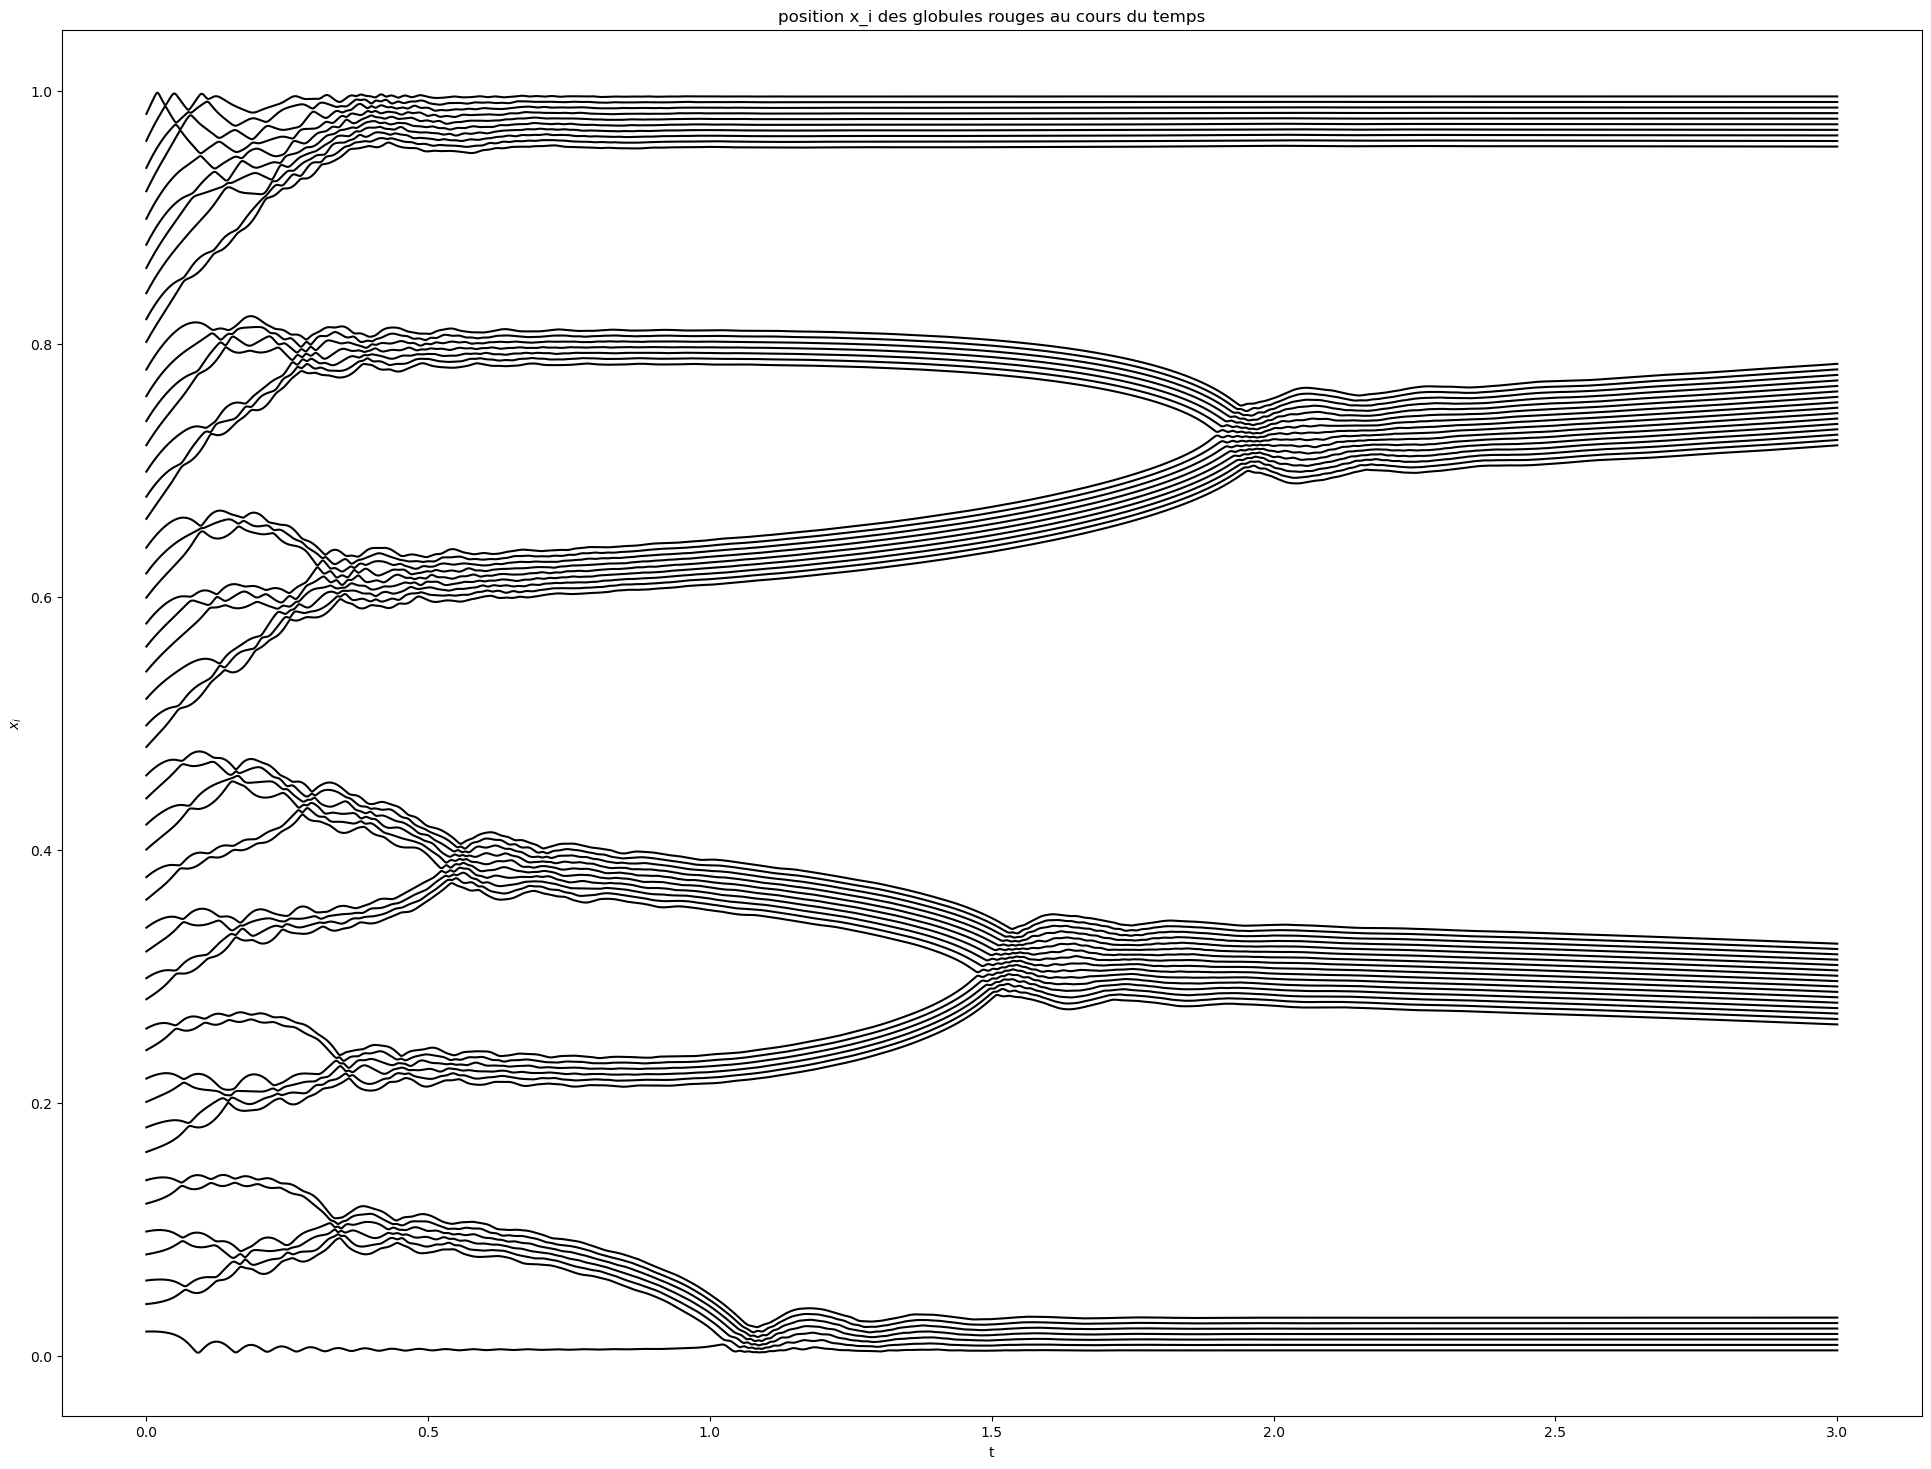

In [8]:
gamma=0.5
a=0.004
lm=10

def fphi(d):
    return (gamma/d)*np.log(d/a)

def F(X):
    (n,m)=np.shape(X)
    Y=np.zeros((n,m))
    Y[0,:]=X[1,:]
    Xaux=np.zeros(m+2)
    Xaux[-1]=1
    Xaux[1:-1]=X[0,:]
    Y[1,:]=fphi(Xaux[2:]-Xaux[1:-1])-fphi(Xaux[1:-1]-Xaux[0:-2])-lm*X[1,:]
    return Y

h=0.0002
T=3
N=49

t=np.arange(0,T+h,h)
Nt=np.size(t)
X=np.zeros((2,N,Nt))
R0=-1+2*np.random.rand(N)
X0=np.arange(1/(N+1),1,1/(N+1))+0.1*R0*(1/(N+1))

X[0,:,0]=X0
X[1,:,0]=X0

plt.figure(1,figsize=(24,18))
for n in range(Nt-1):
    Y=F(X[:,:,n])
    X[:,:,n+1]=X[:,:,n]+(h/2)*Y+(h/2)*F(X[:,:,n]+h*Y)
    
for i in range(N):
    plt.plot(t,X[0,i,:],'k')
plt.xlabel('t')
plt.ylabel('$x_i$')
plt.title('position x_i des globules rouges au cours du temps')
